# ...in Python

## PubMed API in Python

by Avery Fernandez

These recipe examples were tested on August 3, 2022.

**NCBI Entrez Programming Utilities documentation:** https://www.ncbi.nlm.nih.gov/books/NBK25501/

**Please see NCBI's Data Usage Policies and Disclaimers:** https://www.ncbi.nlm.nih.gov/home/about/policies/

### 1. Basic PubMed API call
First, import libraries needed to pull data from the API:

In [6]:
from time import sleep
import requests
from pprint import pprint

For calling individual articles and publications, we will need to use this api url.

In [7]:
summary = 'https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esummary.fcgi?db=pubmed&'

The article we are requesting has PubMed ID: 27933103

**retmode** in the web API URL specifies the file format, in this example, we will use json.

In [8]:
url = summary+'id=27933103&retmode=json'
data_call = requests.get(url).json()
pprint(data_call)

{'header': {'type': 'esummary', 'version': '0.3'},
 'result': {'27933103': {'articleids': [{'idtype': 'pubmed',
                                         'idtypen': 1,
                                         'value': '27933103'},
                                        {'idtype': 'doi',
                                         'idtypen': 3,
                                         'value': '10.1186/s13321-016-0181-z'},
                                        {'idtype': 'pii',
                                         'idtypen': 4,
                                         'value': '181'},
                                        {'idtype': 'pmc',
                                         'idtypen': 8,
                                         'value': 'PMC5122160'},
                                        {'idtype': 'rid',
                                         'idtypen': 8,
                                         'value': '27933103'},
                                        {'idtype': '

Data extraction: Let us try to extract the authors of the paper

1) Index to where the authors are stored
2) Create a loop to get authors
3) pull the author names

In [9]:
# Step 1
index = data_call["result"]["27933103"]["authors"]
pprint(index)

[{'authtype': 'Author', 'clusterid': '', 'name': 'Scalfani VF'},
 {'authtype': 'Author', 'clusterid': '', 'name': 'Williams AJ'},
 {'authtype': 'Author', 'clusterid': '', 'name': 'Tkachenko V'},
 {'authtype': 'Author', 'clusterid': '', 'name': 'Karapetyan K'},
 {'authtype': 'Author', 'clusterid': '', 'name': 'Pshenichnov A'},
 {'authtype': 'Author', 'clusterid': '', 'name': 'Hanson RM'},
 {'authtype': 'Author', 'clusterid': '', 'name': 'Liddie JM'},
 {'authtype': 'Author', 'clusterid': '', 'name': 'Bara JE'}]


In [10]:
# Step 2
authorRange = range(len(data_call["result"]["27933103"]["authors"]))
pprint(authorRange)

range(0, 8)


In [11]:
# Step 3
for authors in range(len(data_call["result"]["27933103"]["authors"])):
    pprint(data_call["result"]["27933103"]["authors"][authors]["name"])

'Scalfani VF'
'Williams AJ'
'Tkachenko V'
'Karapetyan K'
'Pshenichnov A'
'Hanson RM'
'Liddie JM'
'Bara JE'


### 2. Request data using a Loop

First, create a list of PubMed IDs:

In [12]:
idList = [34813985, 34813932, 34813684, 34813661, 34813372, 34813140, 34813072]

In [13]:
# get each id
for ids in idList:
    pprint(ids)

34813985
34813932
34813684
34813661
34813372
34813140
34813072


Now we have a way to print each id in a loop, but we need to store it, instead of printing. One way to achieve this with python is by using dictionaries. Python dictionaries work by storing a value and associating it with a specific key. We can establish dictionaries two ways. The first is:

In [14]:
dictionary = {"data": "something"}
pprint(dictionary["data"])

'something'


This is great, but it doesn't allow us to store new data.

So let's try the second way:

In [15]:
dictionary = {}
dictionary["data"] = "something"
pprint(dictionary["data"])

'something'


Now we can go about acquiring the data from PubMed and saving the data in a dictionary, called multiPapers:

In [16]:
multiPapers = {}
for ids in idList:
    url = summary+'id='+ str(ids) + '&retmode=json'
    multiPapers[ids] = requests.get(url).json()
    sleep(1) # add a delay between API calls

In [17]:
pprint(multiPapers[34813985]) # view first one

{'header': {'type': 'esummary', 'version': '0.3'},
 'result': {'34813985': {'articleids': [{'idtype': 'pubmed',
                                         'idtypen': 1,
                                         'value': '34813985'},
                                        {'idtype': 'pii',
                                         'idtypen': 4,
                                         'value': 'S0143-4160(21)00154-8'},
                                        {'idtype': 'doi',
                                         'idtypen': 3,
                                         'value': '10.1016/j.ceca.2021.102500'},
                                        {'idtype': 'pmc',
                                         'idtypen': 8,
                                         'value': 'PMC8752506'},
                                        {'idtype': 'mid',
                                         'idtypen': 8,
                                         'value': 'NIHMS1760117'},
                             

In [18]:
# Get title for each journal
for ids in idList:
    pprint(multiPapers[ids]["result"][str(ids)]["source"])

'Cell Calcium'
'Methods'
'FEBS J'
'Dev Growth Differ'
'CRISPR J'
'Chembiochem'
'Methods Mol Biol'


### 3. PubMed API Calls with Requests & Parameters

For searching for articles using search term(s), we will need to use this api url:

In [19]:
search = 'https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi?db=pubmed&'

when searching through the articles, we are given a few of ways of filtering the data.

A list of all the available parameters for these requests can be found in the official NCBI documentation: https://www.ncbi.nlm.nih.gov/books/NBK25499/

```
db=<database>
```
we will be using the pubmed database

```
term=<searchQuery>
```
we can use term to search data, just make sure to replace spaces with +

We can, for example, use a query to search PubMed, such as "neuroscience intervention learning":

In [20]:
url = search+"term=neuroscience+intervention+learning&retmode=json"
data = requests.get(url).json()
pprint(data)

{'esearchresult': {'count': '19286',
                   'idlist': ['35917919',
                              '35916866',
                              '35914440',
                              '35911084',
                              '35910354',
                              '35910307',
                              '35910264',
                              '35910196',
                              '35910192',
                              '35909217',
                              '35908308',
                              '35908254',
                              '35907374',
                              '35905809',
                              '35905111',
                              '35904092',
                              '35903787',
                              '35903114',
                              '35899379',
                              '35899205'],
                   'querytranslation': '("neurosciences"[MeSH Terms] OR '
                                       '"neurosc

The number of returned IDs can be adjusted with the retmax paramater:

In [21]:
url = search+"term=neuroscience+intervention+learning&retmax=25&retmode=json"
data = requests.get(url).json()
# pprint(data) # show all data

In [22]:
data["esearchresult"]["idlist"]

['35917919',
 '35916866',
 '35914440',
 '35911084',
 '35910354',
 '35910307',
 '35910264',
 '35910196',
 '35910192',
 '35909217',
 '35908308',
 '35908254',
 '35907374',
 '35905809',
 '35905111',
 '35904092',
 '35903787',
 '35903114',
 '35899379',
 '35899205',
 '35899035',
 '35897070',
 '35895686',
 '35895611',
 '35895472']

In [23]:
len(data["esearchresult"]["idlist"])

25

We can also use the query to search for an author.

we will add ```[au]``` after the name to specify it is an author

In [24]:
url = search+"term=Darwin[au]&retmode=json"
data = requests.get(url).json()

# get a count of the results:
data["esearchresult"]["count"]

'591'

We can also sort results:

```
usehistory=y
```
This allows us to store the data for it to be sorted in the same api call.
```
sort=pub+date
```
This will sort the ids by the publishing date.

In [25]:
url = search+"term=Coral+Reefs&retmode=json&usehistory=y&sort=pub+date"
data = requests.get(url).json()
data["esearchresult"]["idlist"]

['35789026',
 '35640726',
 '35623566',
 '35739736',
 '35757879',
 '35757872',
 '35916134',
 '35881791',
 '35709940',
 '35075743',
 '35767228',
 '35490995',
 '35662355',
 '35593317',
 '35451154',
 '35106864',
 '35474114',
 '35444262',
 '35908086',
 '35914433']

In [26]:
# compare to unsorted:
url = search+"term=Coral+Reefs&retmode=json"
data = requests.get(url).json()
data["esearchresult"]["idlist"]

['35916134',
 '35914433',
 '35912336',
 '35910778',
 '35908086',
 '35903994',
 '35902906',
 '35902758',
 '35901874',
 '35901124',
 '35901047',
 '35898942',
 '35898918',
 '35896607',
 '35895598',
 '35883230',
 '35881791',
 '35874430',
 '35873907',
 '35872442']

Searching based on publication types:

we can do this by adding **AND** into the search
```
term=<searchQuery>+AND+filter[filterType]
```
```[pt]``` specifies that the filter type is publication type

More filters can be found at https://pubmed.ncbi.nlm.nih.gov/help/

In [27]:
url = search+"term=stem+cells+AND+clinical+trial[pt]&retmode=json"
data = requests.get(url).json()
sleep(1)
pprint(data)

{'esearchresult': {'count': '6165',
                   'idlist': ['35902979',
                              '35860245',
                              '35854356',
                              '35841057',
                              '35839786',
                              '35832072',
                              '35820718',
                              '35799191',
                              '35798714',
                              '35767439',
                              '35765103',
                              '35765085',
                              '35764638',
                              '35753607',
                              '35745176',
                              '35744082',
                              '35732348',
                              '35725652',
                              '35717989',
                              '35715872'],
                   'querytranslation': '("stem cells"[MeSH Terms] OR '
                                       '("stem"[All 

### 4. PubMed API metadata visualization

#### Frequency of topic sortpubdate field
Extracting the sortpubdate field for a “hydrogel drug” search results, limited to publication type clinical trials:

In [28]:
url = search+"term=hydrogel+drug+AND+clinical+trial[pt]&sort=pub+date&retmax=500&retmode=json"
data = requests.get(url).json()
ids = data["esearchresult"]["idlist"]
pprint(ids[0:10]) # first 10

['35556170',
 '35413602',
 '35041809',
 '34915741',
 '34695615',
 '35062896',
 '34433303',
 '34334720',
 '33290635',
 '34152880']


In [29]:
len(ids)

294

In [30]:
####### this will take a few minutes.... #########

# now loop through each IDs and get the sortpubdate field. 
# Note that this sortpubdate field may not necassarily be equivalent to a publication date
pubDates=[]
for id in ids:
    url = summary+"id="+str(id)+"&retmode=json"
    request = requests.get(url).json()
    sleep(1)
    pubDates.append(request["result"][id]["sortpubdate"][0:10])
pprint(pubDates[0:10])

['2022/08/01',
 '2022/06/01',
 '2022/05/01',
 '2022/04/01',
 '2022/03/01',
 '2022/01/21',
 '2022/01/01',
 '2022/01/01',
 '2022/01/01',
 '2021/09/01']


In [31]:
len(pubDates)

294

Now that we have sortpubdates, if we want to visualize them in matplotlib, we have to convert it over to something it understands

In [32]:
from datetime import datetime
for dates in range(len(pubDates)):
    pubDates[dates] = datetime.strptime(pubDates[dates],'%Y/%m/%d')
pprint(pubDates[0:10])

[datetime.datetime(2022, 8, 1, 0, 0),
 datetime.datetime(2022, 6, 1, 0, 0),
 datetime.datetime(2022, 5, 1, 0, 0),
 datetime.datetime(2022, 4, 1, 0, 0),
 datetime.datetime(2022, 3, 1, 0, 0),
 datetime.datetime(2022, 1, 21, 0, 0),
 datetime.datetime(2022, 1, 1, 0, 0),
 datetime.datetime(2022, 1, 1, 0, 0),
 datetime.datetime(2022, 1, 1, 0, 0),
 datetime.datetime(2021, 9, 1, 0, 0)]


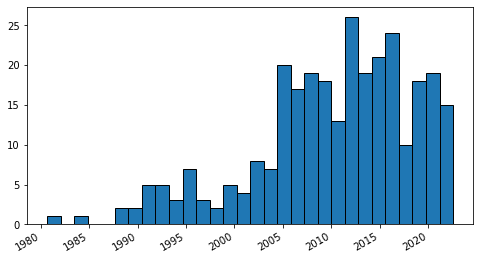

In [34]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.hist(pubDates, bins=30,edgecolor='black')
fig.set_size_inches(8, 4)
# set_size specifies the size of the graph
# Rotates and right-aligns the x labels so they don't crowd each other.
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')
plt.show()

#### Frequency of publication for an author search

In [41]:
url = search+"term=Reed+LK[au]&sort=pub+date&retmax=500&retmode=json"
data = requests.get(url).json()
ids = data["esearchresult"]["idlist"]

In [42]:
len(ids)

54

In [43]:
pubDates=[]
for id in ids:
    url = summary+"id="+str(id)+"&retmode=json"
    request = requests.get(url).json()
    sleep(1)
    dateWithTime = request["result"][id]["sortpubdate"]
    pubDates.append(request["result"][id]["sortpubdate"][0:10])
    # [0:10] used to only grab the date and leave out the time

In [44]:
from datetime import datetime
for dates in range(len(pubDates)):
    pubDates[dates] = datetime.strptime(pubDates[dates],'%Y/%m/%d')
# pprint(pubDates)

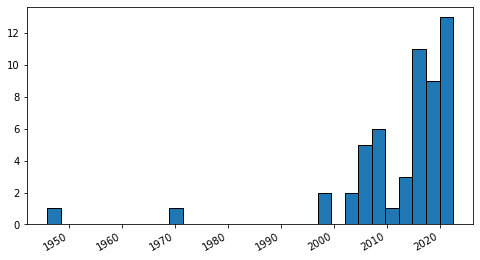

In [45]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.hist(pubDates, bins=30,edgecolor='black')
fig.set_size_inches(8, 4)
# Rotates and right-aligns the x labels so they don't crowd each other.
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')
plt.show()